<a href="https://colab.research.google.com/github/alexshtf/alexshtf.github.io/blob/master/assets/polyfeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def true_func(x):
  return np.sin(8 * np.pi * x) / np.exp(x) + x

m = 30
sigma = 0.1

# generate
np.random.seed(42)
X = np.random.rand(m)
y = true_func(X) + sigma * np.random.randn(m)

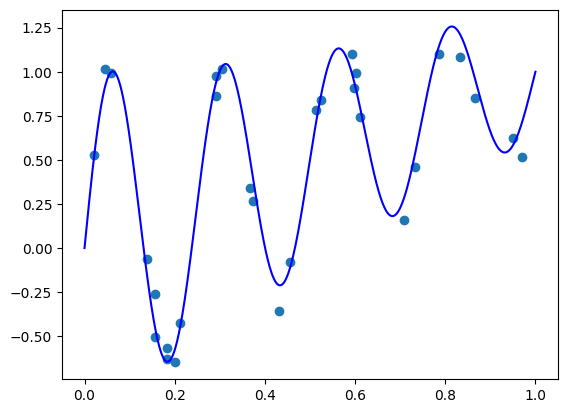

In [ ]:
import matplotlib.pyplot as plt

plt_xs = np.linspace(0, 1, 1000)
plt.scatter(X, y)
plt.plot(plt_xs, true_func(plt_xs), 'blue')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy.polynomial.polynomial as poly

n = 50
model = LinearRegression(fit_intercept=False)
model.fit(poly.polyvander(X, deg=n), y)

LinearRegression(fit_intercept=False)

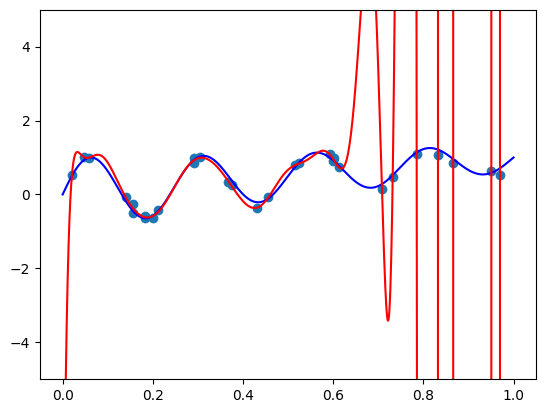

In [ ]:
plt.scatter(X.ravel(), y.ravel())                                    # plot the samples
plt.plot(plt_xs, true_func(plt_xs), 'blue')                          # plot the true function
plt.plot(plt_xs, model.predict(poly.polyvander(plt_xs, deg=n)), 'r') # plot the fit model
plt.ylim([-5, 5])
plt.show()

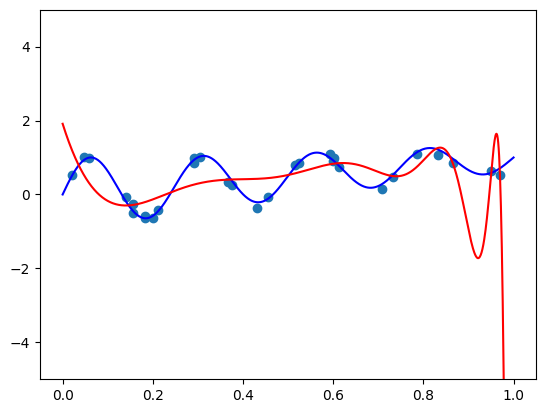

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(fit_intercept=False, alpha=1e-7)
model.fit(poly.polyvander(X, deg=n), y)

plt.scatter(X.ravel(), y.ravel())                                    # plot the samples
plt.plot(plt_xs, true_func(plt_xs), 'blue')                          # plot the true function
plt.plot(plt_xs, model.predict(poly.polyvander(plt_xs, deg=n)), 'r') # plot the fit model
plt.ylim([-5, 5])
plt.show()

In [ ]:
def fit_and_plot(vander, n, alpha):
  model = Ridge(fit_intercept=False, alpha=alpha)
  model.fit(vander(X, deg=n), y)

  plt.scatter(X.ravel(), y.ravel())                           # plot the samples
  plt.plot(plt_xs, true_func(plt_xs), 'blue')                 # plot the true function
  plt.plot(plt_xs, model.predict(vander(plt_xs, deg=n)), 'r') # plot the fit model
  plt.ylim([-5, 5])
  plt.show()

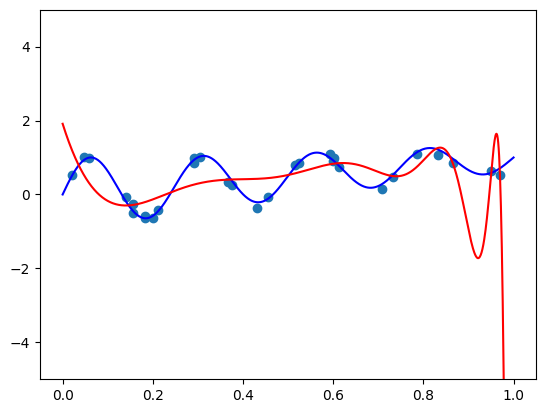

In [ ]:
fit_and_plot(poly.polyvander, n=50, alpha=1e-7)

In [ ]:
import numpy.polynomial.chebyshev as cheb

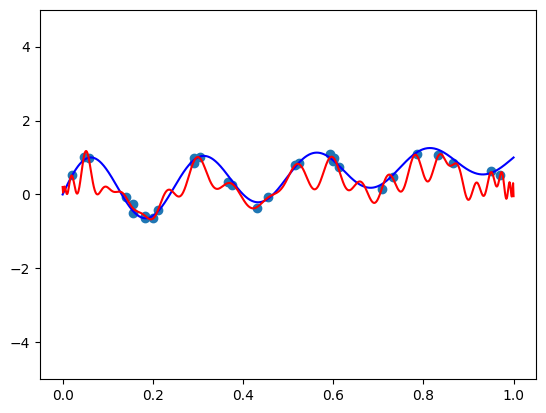

In [ ]:
def scaled_chebvander(x, deg):
  return cheb.chebvander(2 * x - 1, deg=deg)

fit_and_plot(scaled_chebvander, n=50, alpha=1)

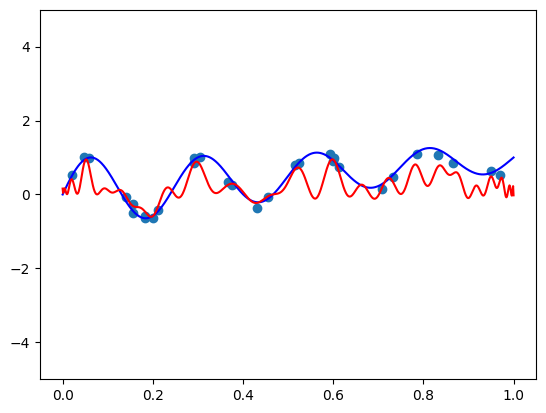

In [ ]:
fit_and_plot(scaled_chebvander, n=50, alpha=10)

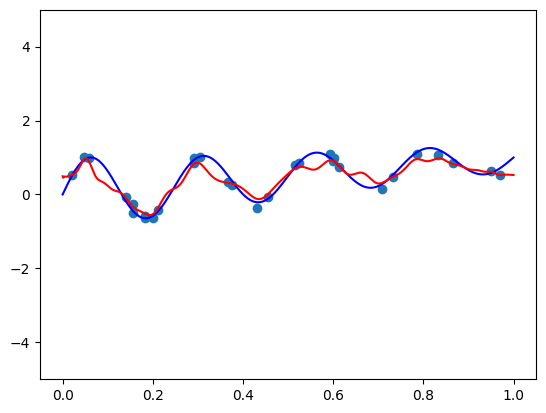

In [ ]:
import numpy.polynomial.legendre as leg

def scaled_legvander(x, deg):
  return leg.legvander(2 * x - 1, deg=deg)

fit_and_plot(scaled_legvander, n=50, alpha=0.5)

In [ ]:
from scipy.stats import binom

def bernvander(x, deg):
	return binom.pmf(np.arange(1 + deg), deg, x.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


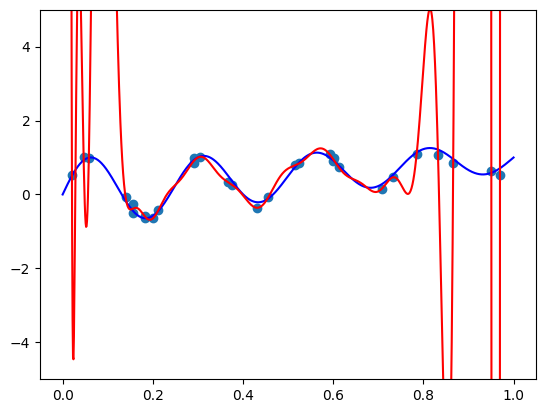

In [ ]:
fit_and_plot(bernvander, n=50, alpha=0)

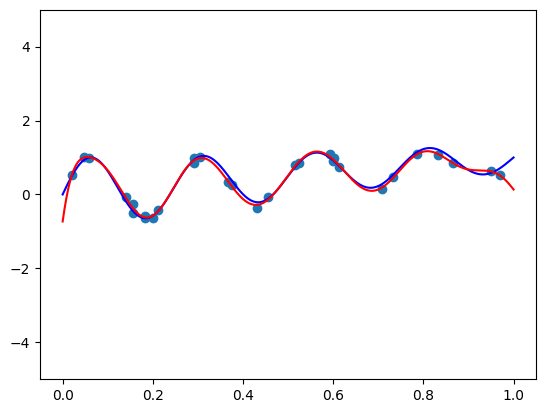

In [ ]:
fit_and_plot(bernvander, n=50, alpha=5e-4)

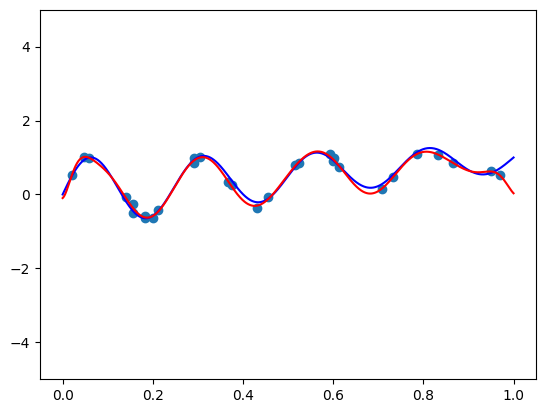

In [ ]:
fit_and_plot(bernvander, n=100, alpha=5e-4)